In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IFarmProject
Question: What crops and countries cause the most pollution? What is driving these countries to have a high nitrogen content? What can be done to decrease the nitrogen usage?




In [2]:
# iFarmData
scipy.io.loadmat('data/iFarmData')
data = scipy.io.loadmat('data/iFarmData')
#print(data)

In [3]:
sorted(data.keys())
#data['FAOSTAT_CoName_FAO']

['AreaH_FAO',
 'Co_ID_group_X',
 'FAOSTAT_CoCODE_FAO',
 'FAOSTAT_CoName_FAO',
 'FAOSTAT_CrCODE_FAO',
 'FAOSTAT_CrName_FAO',
 'GDPPCAP_WB',
 'NC_Bou',
 'NUE_3d',
 'Ndep_kgkm',
 'Nexc_kgkm',
 'Nfer_kgkm',
 'NfixR_kgkm_HDF',
 'Nfix_kgkm',
 'Nman_kgkm',
 'Nyield_kgkm',
 'Popu_FAO',
 'Popu_rural_FAO',
 'Pr_Crop_US',
 'Yield_FAO',
 'Yr',
 '__globals__',
 '__header__',
 '__version__',
 'cr_group_com',
 'netImTrade',
 'netImTradeVal']

In [4]:
data['Yr']

array([[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
        1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
        1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
        1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]],
      dtype=uint16)

# Finding the Most Nitrogen Polluting Country

In [5]:
N_sur = data['Nexc_kgkm']

yr2015 = int(np.where(data['Yr'][0] == 2015)[0])
yr1961 = int(np.where(data['Yr'][0] == 1961)[0])


mexico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Mexico')[0])
US = int(np.where(data['FAOSTAT_CoName_FAO'] == 'United States of America')[0])
china = int(np.where(data['FAOSTAT_CoName_FAO'] == 'China')[0])
PRico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Puerto Rico')[0])


In [6]:
N_content = data['Nyield_kgkm']
cr_name = data['FAOSTAT_CrName_FAO'][0]
c_name = data['FAOSTAT_CoName_FAO']

allData = N_content[:,:,:].sum(axis = 2)
AllNyield = pd.DataFrame(allData)
#AllNyield

<BarContainer object of 20 artists>

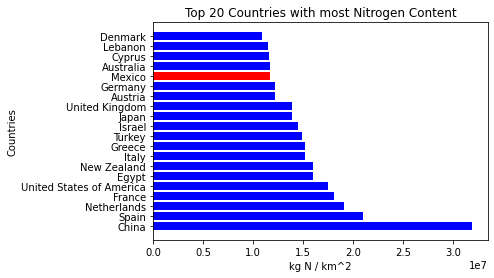

In [7]:
yields = AllNyield.sum(axis =1)
y = yields.sort_values(ascending = False).head(20)

x = [c_name[39][0][0],c_name[179][0][0],c_name[133][0][0],c_name[68][0][0],c_name[206][0][0],c_name[58][0][0], c_name[135][0][0],
    c_name[94][0][0],c_name[76][0][0],c_name[196][0][0],c_name[93][0][0],c_name[96][0][0],c_name[203][0][0],c_name[9][0][0],c_name[74][0][0],
    c_name[122][0][0],c_name[8][0][0],c_name[47][0][0],c_name[105][0][0],c_name[53][0][0]]

plt.title('Top 20 Countries with most Nitrogen Content')
plt.xlabel('kg N / km^2')
plt.ylabel('Countries')

plt.rcParams['figure.figsize'] = [8, 8]

plt.barh(x,y, color = ['blue', 'blue', 'blue', 'blue','blue', 'blue','blue','blue','blue','blue','blue','blue','blue','blue','blue',
                      'red','blue','blue','blue','blue',])

# Nitrogen Content in each crop (shown by crop code)

<Figure size 360x360 with 0 Axes>

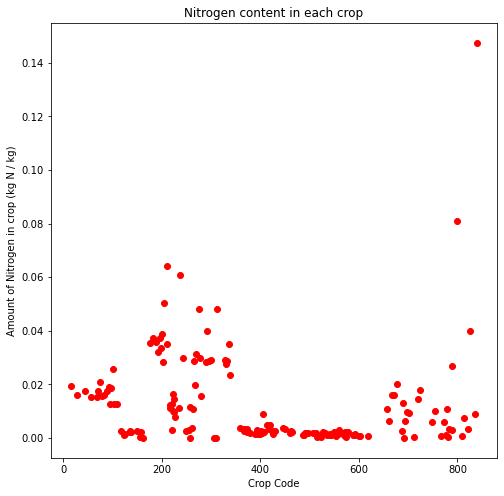

<Figure size 360x360 with 0 Axes>

In [8]:
#NC_Bou --> cr
#FAOSTAT_CrCODE_FAO --> cr

NC = data['NC_Bou']
NC = NC.reshape(170,1)
#print((NC.shape))
#print(type(NC))

cr = data['FAOSTAT_CrCODE_FAO']
#print(len(cr))


# The amount on Nitrogen in each crop
plt.scatter(cr,NC, color = 'Red')
plt.title('Nitrogen content in each crop')
plt.xlabel('Crop Code')
plt.ylabel('Amount of Nitrogen in crop (kg N / kg)')
plt.figure(figsize=(5,5))

Plot shows the amount of Nitrogen contained in each crop

# Most polluting crops by crop id

In [9]:
# Top 10 most polluting crops

m = NC[NC > 0.038]
#print(m)

cr_nc = pd.DataFrame(np.hstack((NC,cr)), columns = ['Nitrogen Content', 'Crop Id'])
#cr_nc

cr_nc[cr_nc['Nitrogen Content'] > 0.038]

,Nitrogen Content,Crop Id
0,0.08100,800.0
63,0.14750,839.0
72,0.04800,311.0
79,0.03872,201.0
82,0.06400,210.0
92,0.03984,292.0
142,0.06080,236.0
157,0.04000,826.0
160,0.04800,275.0
163,0.05040,205.0


Top 10 crops(by Crop ID) that pollute the most nitrogen 

# Matching crop id to crop name

In [10]:
# Names of the top 10 most polluting crops
cr_code = data['FAOSTAT_CrCODE_FAO']
cr_name = data['FAOSTAT_CrName_FAO']

nameAndId = pd.DataFrame(np.hstack((cr_name,cr_code)), columns = ['Crop Name', 'Crop Id'])

nameAndId[(nameAndId['Crop Id'] == 800) | (nameAndId['Crop Id'] == 839) | (nameAndId['Crop Id'] == 311) | (nameAndId['Crop Id'] == 201)
         | (nameAndId['Crop Id'] == 210) | (nameAndId['Crop Id'] == 292) | (nameAndId['Crop Id'] == 236) | (nameAndId['Crop Id'] == 826)
         | (nameAndId['Crop Id'] == 275) | (nameAndId['Crop Id'] == 205)]

,Crop Name,Crop Id
0,[Agave Fibres Nes],800
63,[Gums Natural],839
72,[Kapokseed in Shell],311
79,[Lentils],201
82,[Lupins],210
92,[Mustard seed],292
142,[Soybeans],236
157,[Tobacco; unmanufactured],826
160,[Tung Nuts],275
163,[Vetches],205


In [73]:
#cr_name

Listed above is the top 10 most polluting crops 

# Top 10 most polluting crops
Agave Fibres Nes (800) ---> 0.081 \
Gums Natural (839) ---> 0.14750 \
Kapokseed in Shell (311) ---> 0.048 \
Lentils (201) ---> 0.03872 \
Lupins (210) ---> 0.064 \
Mustard seed (292) ---> 0.03984 \
Soybeans (236) ---> 0.0608 \
Tobacco; unmanufactured (826) ---> 0.04 \
Tung Nuts (275) ---> 0.048 \
Vetches (205) ---> 0.0504

# Tracing back crops to the country they are grown

In [12]:
c_code = data['FAOSTAT_CoCODE_FAO']
c_name = data['FAOSTAT_CoName_FAO']

countryAndId = pd.DataFrame(np.hstack((c_name,c_code)), columns = ['Country Name', 'Country Id'])
#countryAndId
c_name[57]

array([array(['Ecuador'], dtype='<U7')], dtype=object)

In [13]:
# use Nyield_kgkm possibly

# country,crop,year
N_content = data['Nyield_kgkm']
N_sur = data['Nexc_kgkm'] #kg N / km^2

# Gathering each crops index
agave = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Agave Fibres Nes')[0])
gums = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Gums Natural')[0])
kapo = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Kapokseed in Shell')[0])
lentils = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lentils')[0])
lupins = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lupins')[0])
mustard = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Mustard seed')[0])
soybean = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Soybeans')[0])
tobacco = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tobacco; unmanufactured')[0])
tung = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tung Nuts')[0])
vetches = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Vetches')[0])

# A given year(first year vs. last year)
yr1961 = int(np.where(data['Yr'][0] == 1961)[0])
yr2015 = int(np.where(data['Yr'][0] == 2015)[0])

#Lenght of country name is 218
a = 218
#Length of crop name is 170
b = 170

In [14]:
# Used to find the index of the country that produces the crops we want to look at
# !!! Hopefully we find an easier way to do this !!!

#for i in range(218):
    #if np.isfinite(N_content[i][agave][yr1961]):
        #print(f'Index of country ---> {i}')
        #print(f'Amount of Nitrogen in Crop yield for given crop ---> {N_content[i][vetches][yr2015]}')

# Plotting Nitrogen Content for each crop (1961 vs 2015)

In [15]:
country = data['FAOSTAT_CoName_FAO']
len(country)

218

In [16]:
for i in range(218):
    if np.isfinite(N_sur[i][kapo][yr2015]):
        print(N_sur[i][kapo][yr2015])

## Fibres Agave Nes

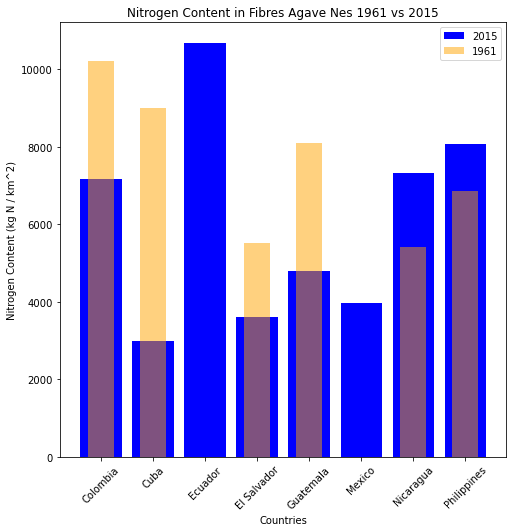

In [17]:
for i in range(218):
    if np.isfinite(N_content[i][agave][yr2015]):
        #print(N_content[i][agave][yr1961])
        x = country[i][0][0]
        y = N_content[i][agave][yr2015]
        y2 = N_content[i][agave][yr1961]
        
       # x_tick = range(len(x))
        plt.title('Nitrogen Content in Fibres Agave Nes 1961 vs 2015')
        plt.xlabel('Countries')
        plt.ylabel('Nitrogen Content (kg N / km^2)')
        plt.xticks(rotation = 45)
        
        plt.rcParams['figure.figsize'] = [5, 10]
        
        
        plt.bar(x,y, color = 'blue', label = '2015')
        plt.bar(x,y2, color = 'orange', alpha = 0.5, width = 0.5, label = '1961')
       
        plt.legend(['2015', '1961']) 

In [18]:
#for i in range(218):
#    if np.isfinite(N_content[i][agave][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][agave][yr2015]
        
#        plt.title('Nitrogen Content in Fibres Agave Nes (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axhline(y = 10200.33, color = 'red')
#        plt.xticks(rotation = 45)
#        plt.rcParams['figure.figsize'] = [5, 7]
            
#        plt.bar(x, y)

## Lentils

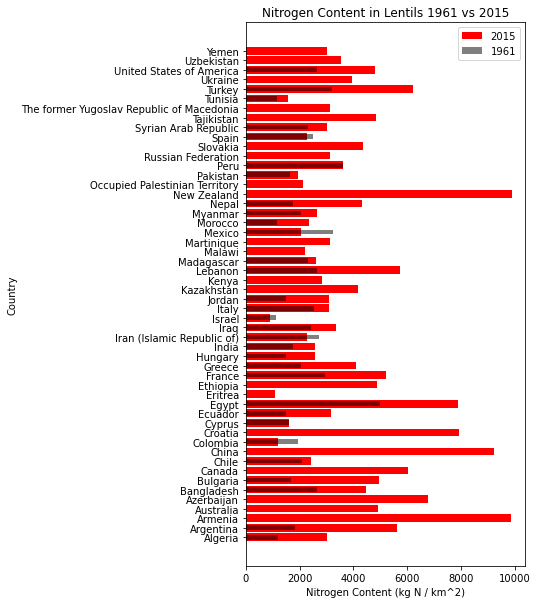

In [19]:
for i in range(218):
    if np.isfinite(N_content[i][lentils][yr2015]):
        #print(N_content[i][lentils][yr1961])
        x = country[i][0][0]
        y = N_content[i][lentils][yr2015]
        y2 = N_content[i][lentils][yr1961]
        
        plt.title('Nitrogen Content in Lentils 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Country')
        
        #plt.xticks(rotation = 70, size = 10)
        
        plt.rcParams['figure.figsize'] = [10, 13]
            
        plt.barh(x, y, color = 'red')
        plt.barh(x,y2, color = 'black', alpha = 0.5, height = 0.5)
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [20]:
#for i in range(218):
#    if np.isfinite(N_content[i][lentils][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][lentils][yr2015]
        
#        plt.title('Nitrogen Content in Lentils (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axhline(y = 5005.72, color = 'red')
#        plt.xticks(rotation = 70)
#        plt.rcParams['figure.figsize'] = [25, 5]
        
#        plt.bar(x, y, width = 0.4)

## Lupins

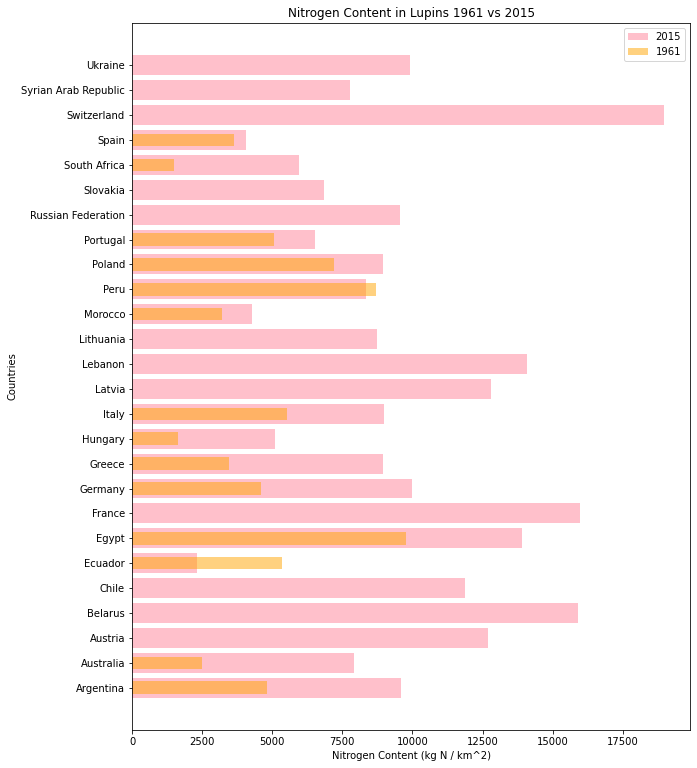

In [21]:
for i in range(218):
    if np.isfinite(N_content[i][lupins][yr2015]):
        #print(N_content[i][lupins][yr1961])
        x = country[i][0][0]
        y = N_content[i][lupins][yr2015]
        y2 = N_content[i][lupins][yr1961]
        
        plt.title('Nitrogen Content in Lupins 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Countries')
        
        plt.rcParams['figure.figsize'] = [8, 8]
        
        plt.barh(x, y, color = 'pink', label = '2015')
        plt.barh(x,y2, color = 'orange', alpha = 0.5, height = 0.5, label = '1961')
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [22]:
#for i in range(218):
#    if np.isfinite(N_content[i][lupins][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][lupins][yr2015]
        
#        plt.title('Nitrogen Content in Lupins (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 9769.6, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [5, 10]
        
#        plt.barh(x, y)

## Mustard seed

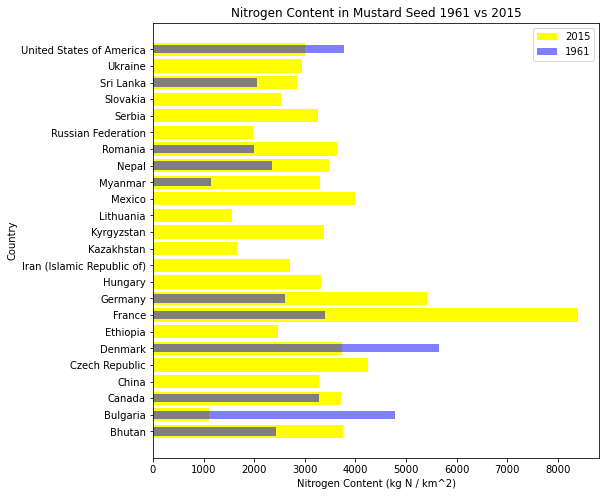

In [23]:
for i in range(218):
    if np.isfinite(N_content[i][mustard][yr2015]):
        #print(N_content[i][mustard][yr1961])
        x = country[i][0][0]
        y = N_content[i][mustard][yr2015]
        y2 = N_content[i][mustard][yr1961]
        
        plt.title('Nitrogen Content in Mustard Seed 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [5, 10]
        
        plt.barh(x, y, color = 'yellow', label = '2015')
        plt.barh(x,y2, color = 'blue', alpha = 0.5, height = 0.5, label = '1961')
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [24]:
#for i in range(218):
#    if np.isfinite(N_content[i][mustard][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][mustard][yr2015]
        
#        plt.title('Nitrogen Content in Mustard Seed (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 6336.552, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [3, 10]
        
#       plt.barh(x, y)
        
    

## Soybeans

In [25]:
for i in range(218):
    if np.isfinite(N_content[i][soybean][yr1961]):
        print(f'Index {i} is {country[i][0][0]} ---> {N_content[i][soybean][yr1961]}')
        
print('============================================')

for i in range(218):
    if np.isfinite(N_content[i][soybean][yr2015]):
        print(f'Index {i} is {country[i][0][0]} ---> {N_content[i][soybean][yr2015]}')

Index 6 is Argentina ---> 5937.12
Index 8 is Australia ---> 4053.536
Index 25 is Brazil ---> 6851.552
Index 28 is Bulgaria ---> 3219.968
Index 30 is Burundi ---> 6080.0
Index 31 is Cambodia ---> 3984.832
Index 33 is Canada ---> 12788.064
Index 38 is Chile ---> 6080.0
Index 39 is China ---> 3806.08
Index 40 is Colombia ---> 9007.52
Index 51 is Democratic Peoples Republic of Korea ---> 3445.536
Index 52 is Democratic Republic of the Congo ---> 3587.2
Index 57 is Ecuador ---> 7600.0
Index 64 is Ethiopia PDR ---> 8685.888
Index 86 is Hungary ---> 1894.528
Index 88 is India ---> 2763.36
Index 89 is Indonesia ---> 4147.168
Index 90 is Iran (Islamic Republic of) ---> 6080.0
Index 94 is Italy ---> 11653.536
Index 96 is Japan ---> 8190.976
Index 103 is Lao Peoples Democratic Republic ---> 6141.408
Index 107 is Liberia ---> 2026.464
Index 114 is Malaysia ---> 2406.464
Index 122 is Mexico ---> 12068.8
Index 129 is Myanmar ---> 4026.0544
Index 132 is Nepal ---> 3040.0
Index 138 is Nigeria ---> 212

In [26]:
soyDataX = [country[8][0][0], country[25][0][0], country[33][0][0], country[39][0][0], country[88][0][0], country[94][0][0],
           country[122][0][0], country[149][0][0], country[179][0][0], country[196][0][0], country[206][0][0]]

soyDataY1961 = [N_content[8][soybean][yr1961], N_content[25][soybean][yr1961], N_content[33][soybean][yr1961],N_content[39][soybean][yr1961],
           N_content[88][soybean][yr1961], N_content[94][soybean][yr1961], N_content[122][soybean][yr1961], N_content[149][soybean][yr1961],
           N_content[179][soybean][yr1961], N_content[196][soybean][yr1961], N_content[206][soybean][yr1961]]

# ==========================================================================================================================================

soyDataY2015 = [N_content[8][soybean][yr2015], N_content[25][soybean][yr2015], N_content[33][soybean][yr2015],N_content[39][soybean][yr2015],
           N_content[88][soybean][yr2015], N_content[94][soybean][yr2015], N_content[122][soybean][yr2015], N_content[149][soybean][yr2015],
           N_content[179][soybean][yr2015], N_content[196][soybean][yr2015], N_content[206][soybean][yr2015]]

print(soyDataY1961)
print('==================')
print(soyDataY2015)

[4053.536, 6851.552, 12788.064, 3806.08, 2763.36, 11653.536, 12068.8, 5720.672, nan, 5948.064, 10275.2]
[12859.807999999999, 18413.888, 17627.744, 11012.704, 6914.885333333333, 21979.808, 8296.16, 6888.64, 18955.615999999998, 26751.392, 19631.712]


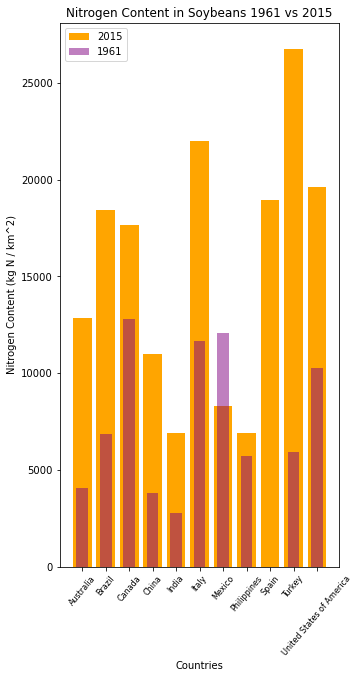

In [27]:
plt.title('Nitrogen Content in Soybeans 1961 vs 2015')
plt.xlabel('Countries')
plt.ylabel('Nitrogen Content (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 8]

plt.xticks(rotation = 50, size = 8)
plt.bar(soyDataX, soyDataY2015, color = 'orange', label = '2015')
plt.bar(soyDataX, soyDataY1961, color = 'purple', alpha = 0.5, width = 0.5, label = '1961')

plt.legend()

In [28]:
#for i in range(218):
#    if np.isfinite(N_content[i][soybean][yr1961]):
        #print(N_content[i][soybean][yr1961])
#        x = country[i][0][0]
#        y = N_content[i][soybean][yr1961]
        
#        plt.title('Nitrogen Content in Soybeans (1961)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
        
#        plt.rcParams['figure.figsize'] = [11, 10]
        
#        plt.barh(x, y)

In [29]:
#for i in range(218):
#    if np.isfinite(N_content[i][soybean][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][soybean][yr2015]
        
#        plt.title('Nitrogen Content in Soybeans (2015)')
#        plt.xlabel('Country ID')
#        plt.ylabel('Nitrogen Content in Crop Yield')
#        plt.axvline(x = 12788.064, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [10,20]
        
        
#        plt.barh(x, y)

## Tobacco

In [30]:
tobaccoDataX = [country[8][0][0], country[25][0][0], country[33][0][0], country[39][0][0], country[88][0][0], country[94][0][0],
           country[122][0][0], country[149][0][0], country[179][0][0], country[196][0][0], country[206][0][0]]

tobaccoDataY1961 = [N_content[8][tobacco][yr1961], N_content[25][tobacco][yr1961], N_content[33][tobacco][yr1961],N_content[39][tobacco][yr1961],
           N_content[88][tobacco][yr1961], N_content[94][tobacco][yr1961], N_content[122][tobacco][yr1961], N_content[149][tobacco][yr1961],
           N_content[179][tobacco][yr1961], N_content[196][tobacco][yr1961], N_content[206][tobacco][yr1961]]

# ==========================================================================================================================================

tobaccoDataY2015 = [N_content[8][tobacco][yr2015], N_content[25][tobacco][yr2015], N_content[33][tobacco][yr2015],N_content[39][tobacco][yr2015],
           N_content[88][tobacco][yr2015], N_content[94][tobacco][yr2015], N_content[122][tobacco][yr2015], N_content[149][tobacco][yr2015],
           N_content[179][tobacco][yr2015], N_content[196][tobacco][yr2015], N_content[206][tobacco][yr2015]]


print(tobaccoDataY1961)
print('==================')
print(tobaccoDataY2015)

[5087.2, 2948.8, 6817.6, 4984.0, 3062.4, 5434.56, 5102.400000000001, 2634.4, 7040.0, 2884.4, 7873.6]
[10985.2, 8548.0, 11129.6, 8622.8, 6732.400000000001, 13530.4, 7794.0, 6791.6, 13094.4, 2833.6, 9810.800000000001]


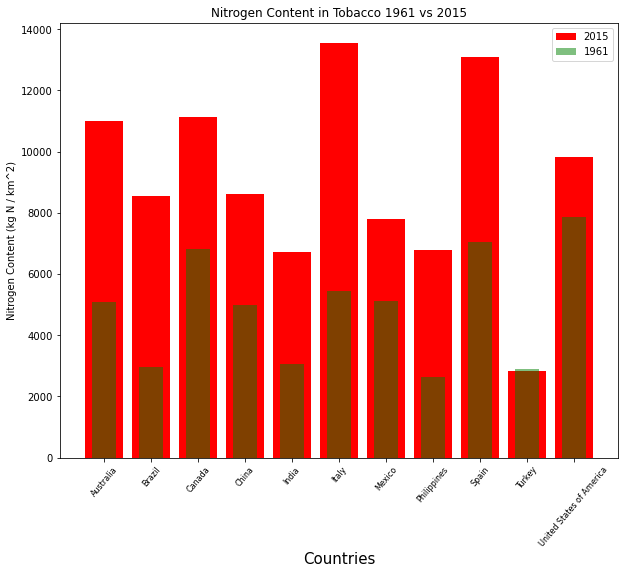

In [31]:
plt.title('Nitrogen Content in Tobacco 1961 vs 2015')
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Nitrogen Content (kg N / km^2)')

plt.rcParams['figure.figsize'] = [15, 15]

plt.xticks(rotation = 50, size = 8)
plt.bar(tobaccoDataX, tobaccoDataY2015, color = 'red', label = '2015')
plt.bar(tobaccoDataX, tobaccoDataY1961, color = 'green', alpha = 0.5, width = 0.5, label = '1961')

plt.legend()

In [32]:
for i in range(218):
    if np.isfinite(N_content[i][tobacco][yr1961]):
        print(f'Index {i} is {country[i][0][0]} --->{N_content[i][tobacco][yr1961]}')

Index 1 is Albania --->1119.6000000000001
Index 2 is Algeria --->2185.2000000000003
Index 3 is American Samoa --->4000.0
Index 4 is Angola --->1616.4
Index 6 is Argentina --->4208.8
Index 8 is Australia --->5087.2
Index 9 is Austria --->7624.0
Index 13 is Bangladesh --->2508.4
Index 17 is Belgium-Luxembourg --->10521.2
Index 19 is Benin --->1248.4
Index 22 is Bolivia (Plurinational State of) --->2666.8
Index 25 is Brazil --->2948.8
Index 28 is Bulgaria --->4019.28
Index 29 is Burkina Faso --->1555.6000000000001
Index 30 is Burundi --->2000.0
Index 31 is Cambodia --->2602.8
Index 32 is Cameroon --->2554.0
Index 33 is Canada --->6817.6
Index 36 is Central African Republic --->1636.4
Index 38 is Chile --->9159.2
Index 39 is China --->4984.0
Index 40 is Colombia --->8241.2
Index 42 is Congo --->1866.8
Index 44 is Costa Rica --->3845.2000000000003
Index 46 is Cuba --->3610.0
Index 47 is Cyprus --->1724.4
Index 49 is Czechoslovakia --->4358.0
Index 50 is C?te dIvoire --->1180.4
Index 51 is D

In [33]:
#for i in range(218):
#    if np.isfinite(N_content[i][tobacco][yr1961]):
        #print(N_content[i][tobacco][yr1961])
        #x = country[i][0][0]
#        x = i
#        y = N_content[i][tobacco][yr1961]
        
#        plt.title('Nitrogen Content in Tobacco (1961)')
#        plt.xlabel('Country ID')
#        plt.ylabel('Nitrogen Content')
        
#        plt.rcParams['figure.figsize'] = [20, 10]
        
#        plt.bar(x, y)

In [34]:
#for i in range(218):
#    if np.isfinite(N_content[i][tobacco][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        #x = country[i][0][0]
#        x = i
#        y = N_content[i][tobacco][yr2015]
        
#        plt.title('Nitrogen Content in Tobacco (2015)')
#        plt.xlabel('Country ID')
#        plt.ylabel('Nitrogen Content')
#        plt.axhline(y = 10800.0, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [15, 10]
        
#        plt.bar(x, y)

## Tung Nuts

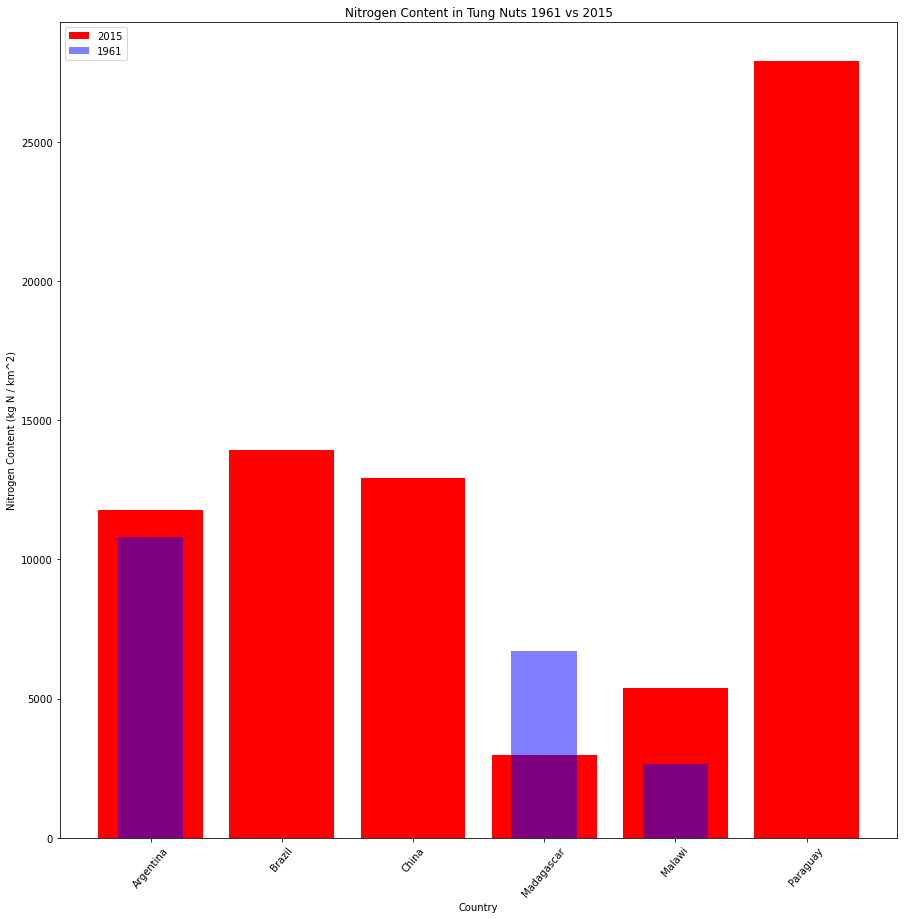

In [35]:
for i in range(218):
    if np.isfinite(N_content[i][tung][yr2015]):
        #print(N_content[i][tung][yr1961])
        x = country[i][0][0]
        y = N_content[i][tung][yr2015]
        y2 = N_content[i][tung][yr1961]
        
        plt.title('Nitrogen Content in Tung Nuts 1961 vs 2015')
        plt.xlabel('Country')
        plt.ylabel('Nitrogen Content (kg N / km^2)')
        
        plt.xticks(rotation = 50)
        
        plt.rcParams['figure.figsize'] = [10, 7]
        
        plt.bar(x, y, color = 'red')
        plt.bar(x, y2, color = 'blue', alpha = 0.5, width = 0.5)
        
        plt.legend(['2015', '1961'])

In [36]:
#for i in range(218):
#    if np.isfinite(N_content[i][tung][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][tung][yr2015]
        
#        plt.title('Nitrogen Content in Tung Nuts (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 10800.0, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [10, 10]
        
#        plt.barh(x, y)

## Vetches

In [72]:
#for i in range(218):
#    if np.isfinite(N_content[i][vetches][yr2015]):
#        print(f'Index {i}')

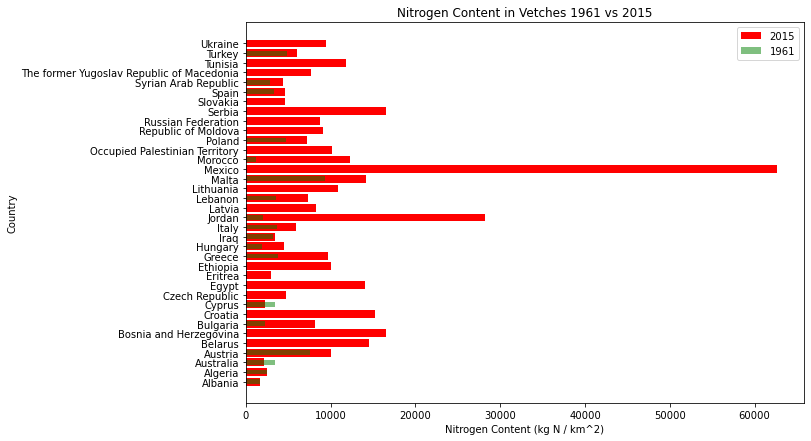

In [38]:
for i in range(218):
    if np.isfinite(N_content[i][vetches][yr2015]):
        #print(N_content[i][vetches][yr1961])
        x = country[i][0][0]
        y = N_content[i][vetches][yr2015]
        y2 = N_content[i][vetches][yr1961]
        
        plt.title('Nitrogen Content in Vetches 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [12, 10]
        
        plt.barh(x, y, color = 'red')
        plt.barh(x, y2, color = 'green', alpha = 0.5, height = 0.5)
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [39]:
#for i in range(218):
#    if np.isfinite(N_content[i][vetches][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][vetches][yr2015]
        
#        plt.title('Nitrogen Content in Vetches (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 15934.464, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [8, 7]
        
#        plt.barh(x, y)

# Mexico Crop Data

In [40]:
# Collecting Country index for Mexico
mexico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Mexico')[0])
mexico

122

## Mexico Nitrogen Yield

In [74]:
# Accessing Nitrogen yield for every year and crop in Mexico
mexicoNyield = N_content[mexico, :, :]

#DataFrame of data for easier access
NyieldData = pd.DataFrame(mexicoNyield , columns = [np.arange(1961,2016)])
NyieldData

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6277.5000,5953.5000,5612.4900,5272.2900,4939.3800,4620.2400,4773.026250,4050.000000,4484.46375,3977.100000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1983.2320,2057.8560,2026.7520,1995.6480,1964.5440,1934.3360,1943.808000,1953.408000,1962.88000,1972.352000
2,200.00000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,...,387.9900,387.4600,390.9050,400.1600,399.2000,439.2850,457.305000,498.215000,474.11000,532.525000
3,510.45500,558.4550,576.5150,586.3700,587.8400,591.3400,514.3900,526.7150,474.7900,464.8650,...,520.8950,450.3850,463.0350,492.6050,506.2650,554.6050,556.843125,570.150391,646.44500,680.620000
4,2914.49600,2977.8736,3070.5584,3084.5152,3086.8448,3089.3200,3054.4592,3088.3632,2546.4400,2237.6640,...,1013.7088,889.6992,939.7232,891.5296,811.2624,726.7312,783.473600,1163.864000,1060.13440,1265.617600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2042.51760,2009.4840,2002.1760,2023.9020,2078.7300,2098.2960,1662.3720,1734.4080,1947.9060,1866.4200,...,4060.6740,4051.8900,4246.0200,4481.1180,4237.5780,4372.9740,4957.866000,4718.898000,4932.09000,5198.094000
166,4480.58176,3798.9824,4057.8176,5255.1744,4890.7360,4400.1984,5322.5184,5137.0784,5397.0848,5895.4304,...,10203.8848,9920.8448,9786.1568,9699.0976,10576.9120,10692.6656,10195.930400,10332.716800,10137.71200,10392.879067
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4414.8320,2720.0000,6601.7936,9248.0000,10709.3200,11455.9872,12525.654400,13417.379200,11543.59840,12635.991200


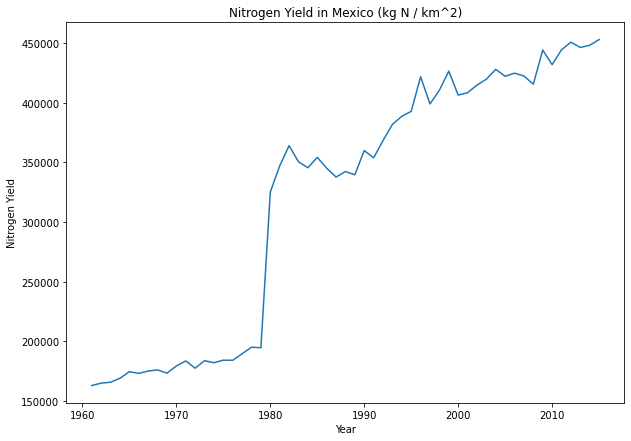

In [71]:
# Plot of Nitrogen Content of Mexico
Nx = np.arange(1961,2016)
Ny = NyieldData.sum(axis = 0)

#print(Ny)

plt.xlabel('Year')
plt.ylabel('Nitrogen Yield')
plt.title('Nitrogen Yield in Mexico (kg N / km^2)' )

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Nx, Ny)

## Plot of crops in Mexico from top 10

In [43]:
# Finding Idx of top 10 crops 
#x = ['Agave', 'Lentils', 'Mustard seed', 'Soybeans', 'Tobacco', 'Vetches']
#y = [N_content[mexico][agave][yr2015], N_content[mexico][lentils][yr2015], N_content[mexico][mustard][yr2015], 
#    N_content[mexico][soybean][yr2015], N_content[mexico][tobacco][yr2015], N_content[mexico][vetches][yr2015]]
#y2 = [N_content[mexico][agave][yr1961], N_content[mexico][lentils][yr1961], N_content[mexico][mustard][yr1961], 
#    N_content[mexico][soybean][yr1961], N_content[mexico][tobacco][yr1961], N_content[mexico][vetches][yr1961]]

#plt.bar(x,y)
#plt.bar(x, y2, alpha = 0.5)

## Crop yield 

In [44]:
# Crop Yield 
agave_yld = data['Yield_FAO'][mexico][agave][yr2015]
lentils_yld = data['Yield_FAO'][mexico][lentils][yr2015]
mustard_yld = data['Yield_FAO'][mexico][mustard][yr2015]
soybean_yld = data['Yield_FAO'][mexico][soybean][yr2015]
tobacco_yld = data['Yield_FAO'][mexico][tobacco][yr2015]
vetches_yld = data['Yield_FAO'][mexico][vetches][yr2015]

print('Mexico produced:')
print('================')
print(f'Fibres Agave Nes : {agave_yld}(kg/km^2)')
print(f'Lentils : {lentils_yld}(kg/km^2)')
print(f'Mustard Seed : {mustard_yld}(kg/km^2)')
print(f'Soybeans : {soybean_yld}(kg/km^2)')
print(f'Tobacco : {tobacco_yld}(kg/km^2)')
print(f'Vetches : {vetches_yld}(kg/km^2)')

Mexico produced:
Fibres Agave Nes : 49100.0(kg/km^2)
Lentils : 52660.0(kg/km^2)
Mustard Seed : 100000.0(kg/km^2)
Soybeans : 136450.0(kg/km^2)
Tobacco : 194850.0(kg/km^2)
Vetches : 1243860.0(kg/km^2)


In [75]:
# Crop Yield Data
crop = data['Yield_FAO']

# Mexico Crop Data
MexicoCrop = crop[mexico,:,:]

#Convert to Pandas
cropData = pd.DataFrame(MexicoCrop , columns = [np.arange(1961,2016)])
cropData

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77500.0,73500.0,69290.0,65090.0,60980.0,57040.0,58926.25,5.000000e+04,55363.75,4.910000e+04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,154940.0,160770.0,158340.0,155910.0,153480.0,151120.0,151860.00,1.526100e+05,153350.00,1.540900e+05
2,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,400000.0,...,775980.0,774920.0,781810.0,800320.0,798400.0,878570.0,914610.00,9.964300e+05,948220.00,1.065050e+06
3,1020910.0,1116910.0,1153030.0,1172740.0,1175680.0,1182680.0,1028780.0,1053430.0,949580.0,929730.0,...,1041790.0,900770.0,926070.0,985210.0,1012530.0,1109210.0,1113686.25,1.140301e+06,1292890.00,1.361240e+06
4,1401200.0,1431670.0,1476230.0,1482940.0,1484060.0,1485250.0,1468490.0,1484790.0,1224250.0,1075800.0,...,487360.0,427740.0,451790.0,428620.0,390030.0,349390.0,376670.00,5.595500e+05,509680.00,6.084700e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1134732.0,1116380.0,1112320.0,1124390.0,1154850.0,1165720.0,923540.0,963560.0,1082170.0,1036900.0,...,2255930.0,2251050.0,2358900.0,2489510.0,2354210.0,2429430.0,2754370.00,2.621610e+06,2740050.00,2.887830e+06
166,229538.0,194620.0,207880.0,269220.0,250550.0,225420.0,272670.0,263170.0,276490.0,302020.0,...,522740.0,508240.0,501340.0,496880.0,541850.0,547780.0,522332.50,5.293400e+05,519350.00,5.324221e+05
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1623100.0,1000000.0,2427130.0,3400000.0,3937250.0,4211760.0,4605020.00,4.932860e+06,4243970.00,4.645585e+06


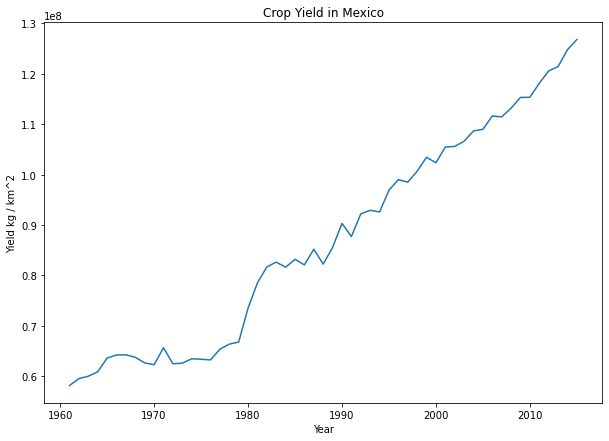

In [46]:
Cx = np.arange(1961,2016)
Cy = cropData.sum(axis = 0)

#print(Cy)

plt.xlabel('Year')
plt.ylabel('Yield kg / km^2')
plt.title('Crop Yield in Mexico')
plt.plot(Cx,Cy)

## Fertilization

In [76]:
fert = data['Nfer_kgkm']# (co,cr,yr)

fertMexico = fert[mexico,:,:]
fertData = pd.DataFrame(fertMexico , columns = [np.arange(1961,2016)])
fertData

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.157884,116.494021,94.346680,115.892200,110.467097,125.112572,157.564921,183.983266,189.125229,179.481933
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8302.053666,8860.006976,7175.580690,8814.235254,8401.626475,9515.494891,11983.673423,13992.932927,14384.007319,13650.581984
2,1413.409060,1493.156689,2091.167322,2045.091769,2270.882106,2287.385141,2596.817076,3037.105210,3651.429943,3571.700868,...,8302.053666,8860.006976,7175.580690,8814.235254,8401.626475,9515.494891,11983.673423,13992.932927,14384.007319,13650.581984
3,1413.409060,1493.156689,2091.167322,2045.091769,2270.882106,2287.385141,2596.817076,3037.105210,3651.429943,3571.700868,...,8302.053666,8860.006976,7175.580690,8814.235254,8401.626475,9515.494891,11983.673423,13992.932927,14384.007319,13650.581984
4,1413.409060,1493.156689,2091.167322,2045.091769,2270.882106,2287.385141,2596.817076,3037.105210,3651.429943,3571.700868,...,8302.053666,8860.006976,7175.580690,8814.235254,8401.626475,9515.494891,11983.673423,13992.932927,14384.007319,13650.581984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1413.409060,1493.156689,2091.167322,2045.091769,2270.882106,2287.385141,2596.817076,3037.105210,3651.429943,3571.700868,...,8302.053666,8860.006976,7175.580690,8814.235254,8401.626475,9515.494891,11983.673423,13992.932927,14384.007319,13650.581984
166,1441.484452,1522.816157,2132.705434,2085.714655,2315.990001,2332.820845,2648.399213,3097.433054,3723.960488,3642.647707,...,8466.962343,9035.998615,7318.113558,8989.317701,8568.513026,9704.506880,12221.712324,14270.882956,14669.725493,13921.731691
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.157884,116.494021,94.346680,115.892200,110.467097,125.112572,157.564921,183.983266,189.125229,179.481933


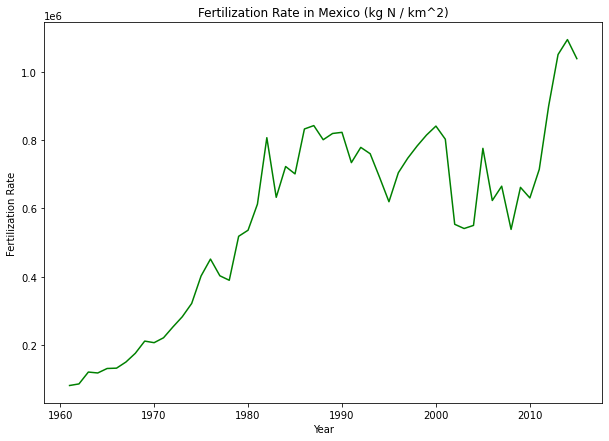

In [70]:
Fx = np.arange(1961,2016)
Fy = fertData.sum(axis = 0)


#print(Fy)

plt.xlabel('Year')
plt.ylabel('Fertilization Rate')
plt.title('Fertilization Rate in Mexico (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Fx,Fy, color = 'green')

## Manure Application

In [77]:
# Manure application data
manure = data['Nman_kgkm']

# Mexioc Manure Application
MexManure = manure[mexico,:,:]

#Convert to Pandas
ManureApp = pd.DataFrame(MexManure , columns = [np.arange(1961,2016)])
ManureApp

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456
2,1108.766159,1183.266736,1208.98894,1209.977607,1266.017562,1228.141463,1369.058886,1396.984975,1508.495335,1499.228023,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456
3,1108.766159,1183.266736,1208.98894,1209.977607,1266.017562,1228.141463,1369.058886,1396.984975,1508.495335,1499.228023,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456
4,1108.766159,1183.266736,1208.98894,1209.977607,1266.017562,1228.141463,1369.058886,1396.984975,1508.495335,1499.228023,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1108.766159,1183.266736,1208.98894,1209.977607,1266.017562,1228.141463,1369.058886,1396.984975,1508.495335,1499.228023,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456
166,1108.766159,1183.266736,1208.98894,1209.977607,1266.017562,1228.141463,1369.058886,1396.984975,1508.495335,1499.228023,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2442.749694,2456.945493,2430.149333,2717.692832,2497.241451,2860.456449,2570.117485,2575.693928,2495.088929,2580.279456


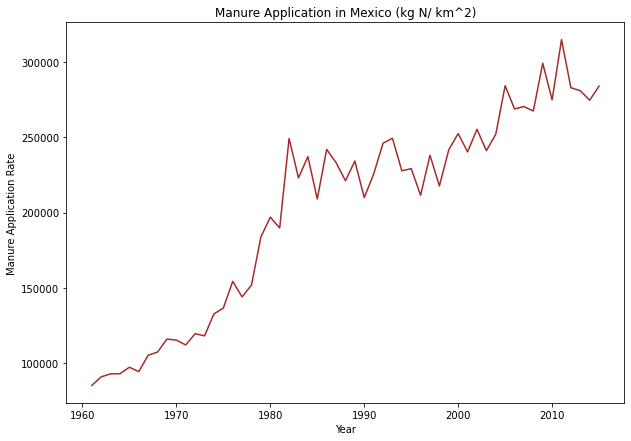

In [69]:
Mx = np.arange(1961,2016)
My = ManureApp.sum(axis = 0)

#print(My)

plt.xlabel('Year')
plt.ylabel('Manure Application Rate')
plt.title('Manure Application in Mexico (kg N/ km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Mx,My, color = 'brown')

## Nitrogen Fixation

In [78]:
# Nitrogen Fixation Data
Nfix = data['Nfix_kgkm']

# Nitrogen Fixation of Mexico Data
MexicoNfix = Nfix[mexico,:,:]

#Convert to Pandas
fixRate = pd.DataFrame(MexicoNfix , columns = [np.arange(1961,2016)])
fixRate

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
166,61.384898,76.827222,55.665088,52.491761,53.997449,59.401878,76.582936,122.674021,132.542895,109.683631,...,0.0,13.446882,34.425406,12.730877,28.541698,25.294562,89.068422,63.538275,87.772681,78.194117
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


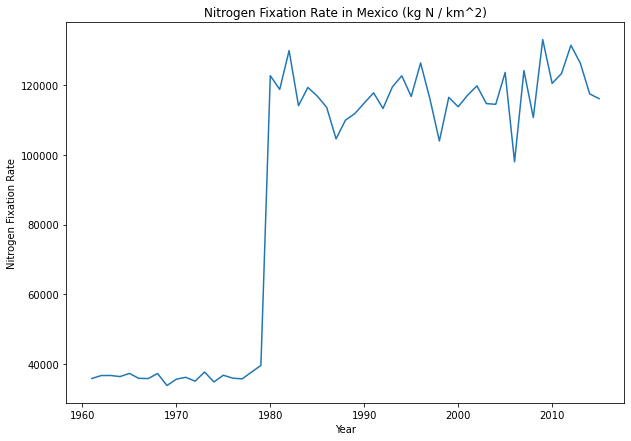

In [68]:
NFx = np.arange(1961,2016)
NFy = fixRate.sum(axis = 0)

#print(NFy)

plt.xlabel('Year')
plt.ylabel('Nitrogen Fixation Rate')
plt.title('Nitrogen Fixation Rate in Mexico (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(NFx,NFy)

## Atmospheric Deposition Rate

In [79]:
# Deposition Data
Depo = data['Ndep_kgkm']

#Mexico Depo Rate
MexicoDepo = Depo[mexico,:,:]

#Convert to Pandas
DepoRate = pd.DataFrame(MexicoDepo , columns = [np.arange(1961,2016)])
DepoRate

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,624.453202,625.739297,627.025392,628.311487,629.597583,630.883678,632.169773,633.455868,634.741963,636.028059
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,568.688211,569.859455,571.030699,572.201944,573.373188,574.544432,575.715676,576.886921,578.058165,579.229409
2,284.976152,292.070629,299.165106,306.259582,313.354059,320.448536,327.543013,334.637489,341.731966,348.826443,...,568.688211,569.859455,571.030699,572.201944,573.373188,574.544432,575.715676,576.886921,578.058165,579.229409
3,284.976152,292.070629,299.165106,306.259582,313.354059,320.448536,327.543013,334.637489,341.731966,348.826443,...,568.688211,569.859455,571.030699,572.201944,573.373188,574.544432,575.715676,576.886921,578.058165,579.229409
4,284.976152,292.070629,299.165106,306.259582,313.354059,320.448536,327.543013,334.637489,341.731966,348.826443,...,568.688211,569.859455,571.030699,572.201944,573.373188,574.544432,575.715676,576.886921,578.058165,579.229409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,284.976152,292.070629,299.165106,306.259582,313.354059,320.448536,327.543013,334.637489,341.731966,348.826443,...,568.688211,569.859455,571.030699,572.201944,573.373188,574.544432,575.715676,576.886921,578.058165,579.229409
166,266.036455,272.659428,279.282402,285.905375,292.528348,299.151322,305.774295,312.397268,319.020242,325.643215,...,530.892832,531.986235,533.079637,534.173040,535.266443,536.359845,537.453248,538.546651,539.640053,540.733456
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,624.453202,625.739297,627.025392,628.311487,629.597583,630.883678,632.169773,633.455868,634.741963,636.028059


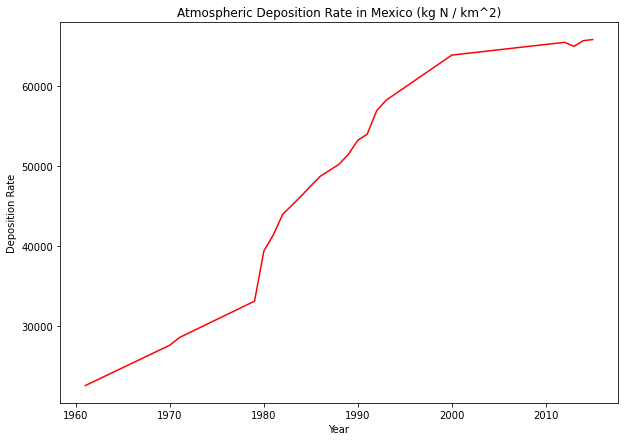

In [67]:
Dx = np.arange(1961,2016)
Dy = DepoRate.sum(axis = 0)

#print(Dy)

plt.xlabel('Year')
plt.ylabel('Deposition Rate')
plt.title('Atmospheric Deposition Rate in Mexico (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Dx,Dy, color = 'red')

## All Nitrogen Factors

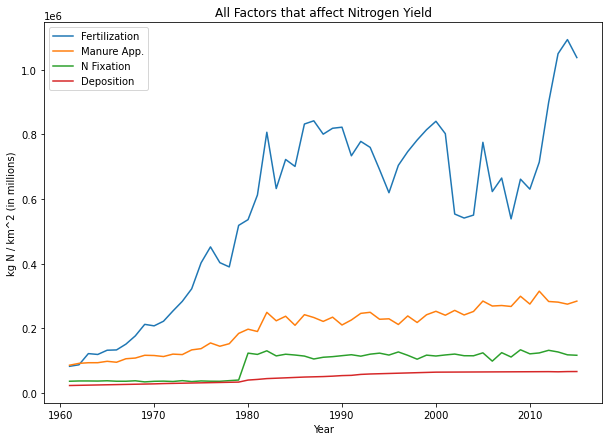

In [56]:
#plt.plot(Nx,Ny, label = 'Nitrogen Content')
#plt.plot(Cx,Cy, label = "Crop Yield")
plt.plot(Fx,Fy, label = 'Fertilization')
plt.plot(Mx,My, label = 'Manure App.')
plt.plot(NFx,NFy, label = 'N Fixation')
plt.plot(Dx,Dy, label = 'Deposition')

plt.rcParams['figure.figsize'] = [10, 7]

#plt.yticks(ticks = np.arange(0, 1.3e6))
plt.xlabel('Year')
plt.ylabel('kg N / km^2 (in millions)')
plt.title('All Factors that affect Nitrogen Yield')
plt.legend()
plt.show()

## Yaqui Valley

166


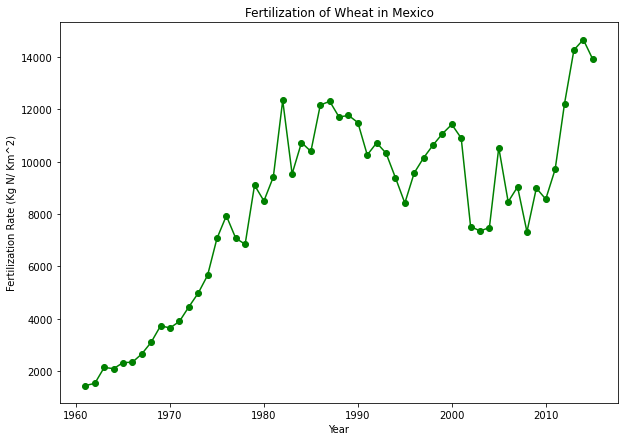

In [57]:
# FERTILIZATION OF WHEAT
wheat = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Wheat')[0])
print(wheat)
xs = data['Yr'].reshape(55,1)
ys = fert[mexico,wheat,:]

#print(ys)

plt.xlabel('Year')
plt.ylabel('Fertilization Rate (Kg N/ Km^2)')
plt.title('Fertilization of Wheat in Mexico')
plt.plot(xs,ys, 'o-', color = 'green')

$\large \frac{14669.73 kg N}{1 km^2} * \frac{1 km^2}{100 H} = \frac{146.7 kg N}{1 H}$

In [58]:
p = fert[mexico,wheat,:]
p
#fertData.sum(axis=0)

array([ 1441.48445245,  1522.81615678,  2132.70543446,  2085.71465528,
        2315.99000065,  2332.82084535,  2648.39921312,  3097.43305399,
        3723.96048796,  3642.64770732,  3889.77861677,  4445.05447436,
        4970.88993141,  5652.84392784,  7063.93552066,  7931.6858916 ,
        7073.5975825 ,  6843.00562231,  9101.33414771,  8499.10200868,
        9414.92702264, 12344.1532013 ,  9533.23312084, 10732.28471968,
       10394.12712767, 12164.982054  , 12310.26200255, 11706.0323303 ,
       11772.16720501, 11495.87727637, 10258.22843573, 10720.90817841,
       10325.93301236,  9389.08787499,  8418.40866157,  9571.07815673,
       10148.70783635, 10634.52200137, 11068.93765221, 11424.68543802,
       10902.36876628,  7521.4764042 ,  7353.47803218,  7476.89856081,
       10539.99387162,  8466.9623433 ,  9035.99861504,  7318.11355807,
        8989.31770103,  8568.51302597,  9704.50687968, 12221.71232382,
       14270.88295585, 14669.72549317, 13921.73169052])

## Imports/Exports

In [59]:
# Show exports of Mexcio 2015
mexico

122

In [60]:
data['netImTrade'][:,:,:,mexico].sum(axis=2)

array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,   12600.,    8200.,  190000.],
       [ 411500.,  733000., 1984500., ...,   29000.,   54500.,   31000.],
       ...,
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [61]:
a = np.array([[1,2,3,4],[2,22,22,2],[3,3,1,1],[1,1,1,1]])

In [62]:
a

array([[ 1,  2,  3,  4],
       [ 2, 22, 22,  2],
       [ 3,  3,  1,  1],
       [ 1,  1,  1,  1]])

In [63]:
a[1,3]

2

In [64]:
a.sum(axis=0)

array([ 7, 28, 27,  8])

In [65]:
data['netImTrade'][:,:,:,mexico].sum(axis = 0).sum(axis = 1).shape

(30,)

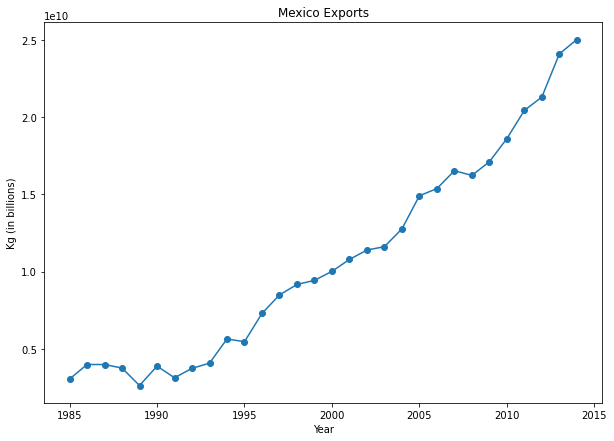

In [66]:
# Mexico Exportd
b = data['netImTrade'][:,:,:,mexico].sum(axis=2).sum(axis=0)
x = np.arange(1985,2015)

plt.title('Mexico Exports')
plt.xlabel('Year')
plt.ylabel('Kg (in billions)')

plt.plot(x,b, 'o-')